## Q-Learning

In [1]:
import sys
sys.path.insert(1, 'games/')
from agent import Agent
from hanoi import Hanoi, Action
import matplotlib.pyplot as plt
import numpy as np
import platform
if platform.system() == "Darwin":
  %config InlineBackend.figure_format="retina"  # For high DPI display

In [2]:
def get_policy_score(env, policy, state):
  scores = []
  for action in Action:
    try:
      scores.append((env.action_to_str(action), policy[action][state]))
    except:
      continue
  return scores

### Q-Learning update rule:
$$
Q[s, a] := (1 - \alpha) * Q[s, a] + \alpha * (r + \gamma * max_{a' \in actions} Q[s', a'])
$$

In [3]:
def plot_Q_evolution(game, agent, it_list, path=None):
  plt.figure(dpi=150)
  nb_optimal_moves = 2**N-1
  nb_moves = []
  for it in it_list:
    tmp = []
    for _ in range(5):
      policy = agent.Q_fit(nb_iterations=it)
      tmp.append(game.play(agent, policy, display=False))
    nb_moves.append(np.mean(tmp))
  
  plt.plot(it_list, nb_moves, ".-", color='r', label="Average number of moves found by the agent")
  plt.axhline(nb_optimal_moves, color="orange", label=f"Optimal number of moves = {nb_optimal_moves}")
  plt.xlabel("Number of iterations")
  plt.ylabel("Number of moves")
  plt.title(f"Solving Towers of Hanoï with {N} disks using Q-Learning")
  lgd = plt.legend(bbox_to_anchor=(0.5, -0.3), loc="center")
  if path != None:
    plt.savefig(path, bbox_extra_artists=(lgd,), bbox_inches="tight")


In [4]:
N = 2
agent = Agent(lambda : Hanoi(N), Action, seed=42)

In [5]:
policy = agent.Q_fit(nb_iterations=150)
_ = Hanoi.play(agent, policy)

(0, 0)
LEFT -> MID
(1, 0)
LEFT -> RIGHT
(1, 2)
MID -> RIGHT
(2, 2)
Number of moves: 3


In [6]:
agent.policy_to_df(policy)

,"(0, 0)","(2, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(2, 1)","(1, 2)"
LEFT -> MID,-10.47500,-19.50000,-19.5,-0.5,NaN,NaN,NaN,NaN
LEFT -> RIGHT,-19.95125,NaN,-10.0,10.0,-0.50000,NaN,NaN,NaN
MID -> LEFT,NaN,NaN,NaN,NaN,-19.95125,-19.5,-19.5,-10.000
MID -> RIGHT,NaN,NaN,-10.0,NaN,-19.95125,-19.5,NaN,10.000
RIGHT -> MID,NaN,-10.47500,NaN,-19.5,NaN,NaN,-10.0,NaN
RIGHT -> LEFT,NaN,-19.95125,NaN,NaN,NaN,NaN,-19.5,-10.475


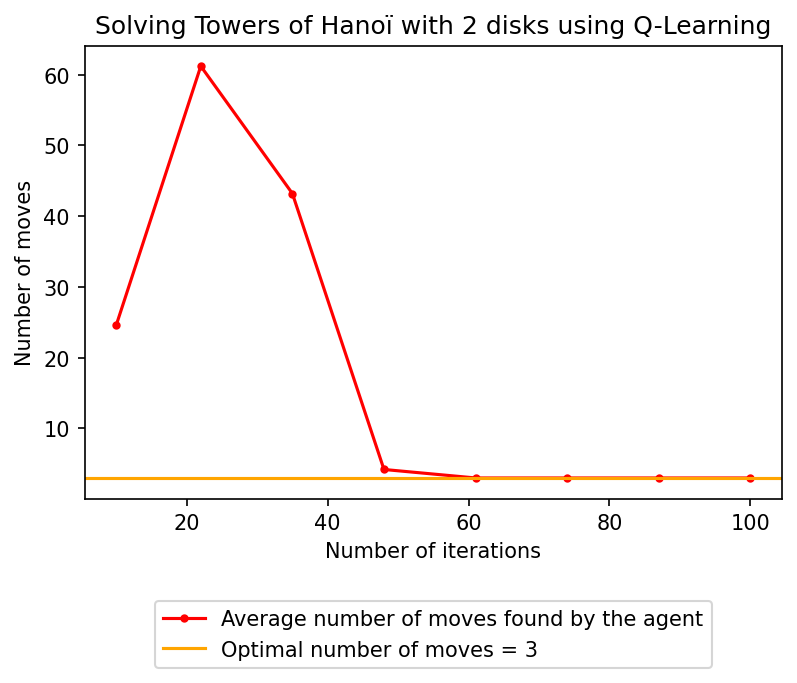

In [7]:
plot_Q_evolution(Hanoi, agent, np.linspace(10, 100, 8, dtype=np.int64))

In [8]:
from connect4 import Connect4, Action

agent = Agent(lambda p: Connect4(p), Action, seed=42)

In [9]:
policies = agent.Q_fit_2_players(nb_games=500)

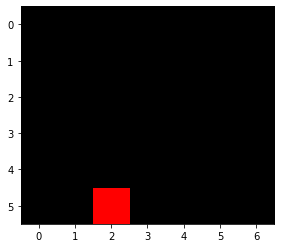

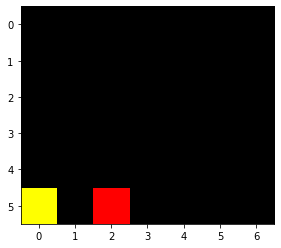

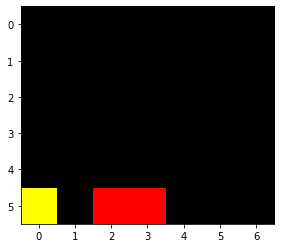

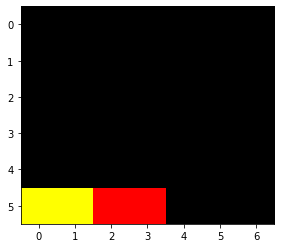

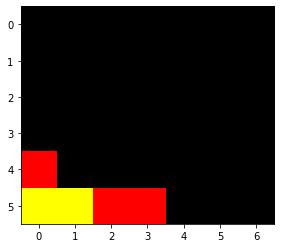

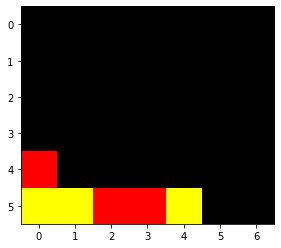

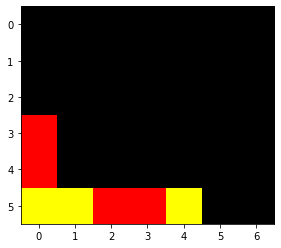

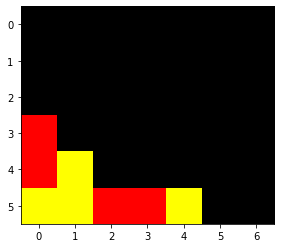

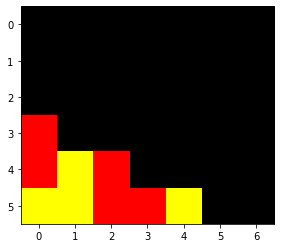

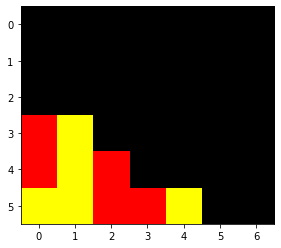

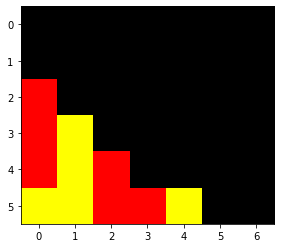

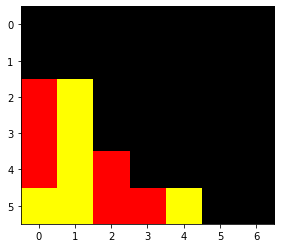

In [10]:
Connect4.play_vs(agent, policies, player=0, state=None)